# Домашнє завдання №11.

Створення рекурентної нейронної мережі за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

Застосувати наступні будови мережі: RNN, LSTM, двосторонню та глибоку.

Порівняйти результати та зробити висновки.

#### 1. Завантаження та підготовка даних

In [41]:
from keras.utils import pad_sequences
from tensorflow import keras
from keras.datasets import imdb

In [42]:
# Встановлюємо гіперпараметри
max_features = 15000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [43]:
# Завантаження даних
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів.
# Залишаться лише ті слова, які зустрічаються не менше 15 000 разів, більш рідкісні будуть проігноровані.
# Це обмеження слів призначене для зменшення розміру векторів слів, що полегшує роботу з моделями

In [44]:
# Передпроцесинг послідовних даних
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

#### 2. Рекурентна модель RNN

In [45]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras import optimizers
from keras import losses
from keras import metrics

In [46]:
model = Sequential([
    Embedding(max_features, 32),
    # додавання Embedding шару для перетворення слів в вектори фіксованої довжини
    SimpleRNN(16, activation="relu"),
    # додавання SimpleRNN шару з 32 вузлами, макс. довж. послідовності 500, величиною словника 10000
    # Dense(128, activation='relu'),
    # Dropout(0.5),
    # Dense(16, activation='relu'),
    # Dropout(0.5),
    Dense(1, activation='sigmoid')  # для бінарної класифікації
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          480000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 480801 (1.83 MB)
Trainable params: 480801 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


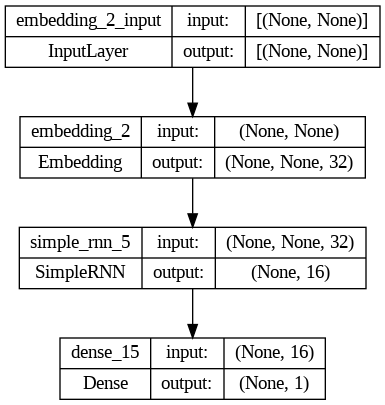

In [47]:
# Візуалізуємо шарову структуру моделі
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [48]:
model_name = 'model_RNN'

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
157/157 [==============================] - 28s 169ms/step - loss: 0.6722 - acc: 0.5978 - val_loss: 47.7581 - val_acc: 0.5062
Epoch 2/10
157/157 [==============================] - 29s 185ms/step - loss: 0.7714 - acc: 0.7753 - val_loss: 0.4281 - val_acc: 0.7928
Epoch 3/10
157/157 [==============================] - 28s 178ms/step - loss: 0.3792 - acc: 0.8508 - val_loss: 0.3560 - val_acc: 0.8482
Epoch 4/10
157/157 [==============================] - 25s 162ms/step - loss: 0.2845 - acc: 0.8848 - val_loss: 0.3424 - val_acc: 0.8584
Epoch 5/10
157/157 [==============================] - 25s 162ms/step - loss: 0.2429 - acc: 0.9082 - val_loss: 0.3662 - val_acc: 0.8342
Epoch 6/10
157/157 [==============================] - 25s 162ms/step - loss: 0.2263 - acc: 0.9202 - val_loss: 0.3065 - val_acc: 0.8862
Epoch 7/10
157/157 [==============================] - 26s 168ms/step - loss: 0.2177 - acc: 0.9358 - val_loss: 0.3031 - val_acc: 0.8844
Epoch 8/10
157/157 [==============================] - 

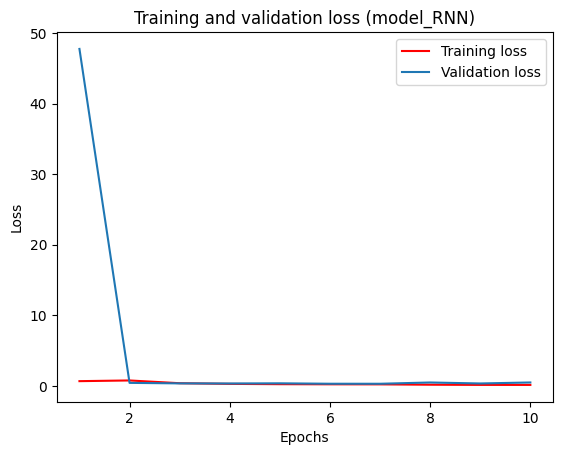

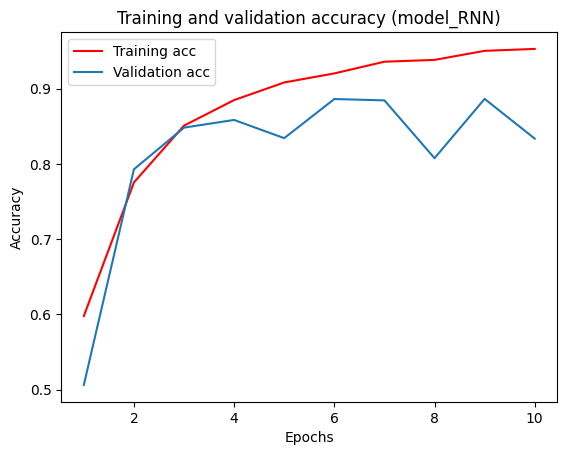

In [49]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history
# print(history_dict.keys())

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title(f'Training and validation loss ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['acc'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_acc'], label='Validation acc')
plt.title(f'Training and validation accuracy ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()